# Part II - Features that affect Borrower's Interest Rate on Loans
## by (Olatunji Titobiloluwa)


## Investigation Overview
I want to investigate the features that have major effect on a Borrower's interest Rate which are Original Loan Amount and Prosper Ratings. 

## Dataset Overview
This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. There are three ordered categorical variables namely : Prosper Ratings, Prosper Score and Employment Status. 
After removing missing loan records (wrangling ), we have a total of 84,853 loans that we made use of for this exploration project.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
prosper_loan= pd.read_csv('prosperLoanData.csv')

In [3]:
# wrangling
# Subset dataframe by selecting features of interest
cols= ['LoanOriginalAmount', 'StatedMonthlyIncome','EmploymentStatus','Term', 
       'ProsperRating (Alpha)', 'BorrowerRate']
loan= prosper_loan[cols]

In [4]:
# convert ProsperRating to ordered categorical variables
rating_order= ['HR','E','D','C','B','A','AA']
ordered_var= pd.api.types.CategoricalDtype(ordered= True, categories= rating_order)
loan['ProsperRating (Alpha)']= loan['ProsperRating (Alpha)'].astype(ordered_var)

# convert EmploymentStatus to ordered categorical variables
employ_order= ['Employed','Self-employed','Full-time','Part-time','Retired','Other','Not employed','Not available']
ordered_var= pd.api.types.CategoricalDtype(ordered= True, categories= employ_order)
loan['EmploymentStatus']= loan['EmploymentStatus'].astype(ordered_var)

## Distribution of Borrower Rate
The distribution of Borrower's rate is roughly multimodal with a small peak at 0.1 and a large peak a little after 0.15. We also have another small peak at 0.20 then another at almost 0.30. Additionally, we have a very sharp peak at approximately 0.32 and then another slight jump right before 0.35.

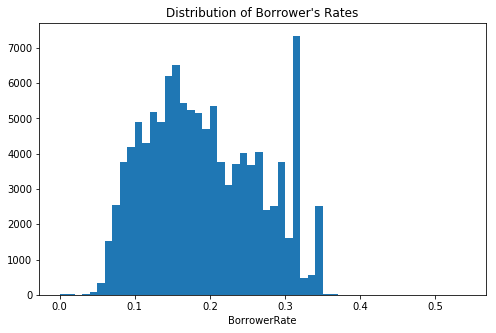

In [5]:
bins = np.arange(0, loan.BorrowerRate.max()+0.05, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = prosper_loan, x = 'BorrowerRate', bins = bins);
plt.xlabel('BorrowerRate');
plt.title("Distribution of Borrower's Rates");

## Distribution of Original Loan Amount
The distribution of the loan amounts are in multiples of thousands. There are very large spikes which occur at almost 5,000, 10,000 and 15,000. We also have some spikes on 20,000, 25,000. Then a smaller spike at 35,000.

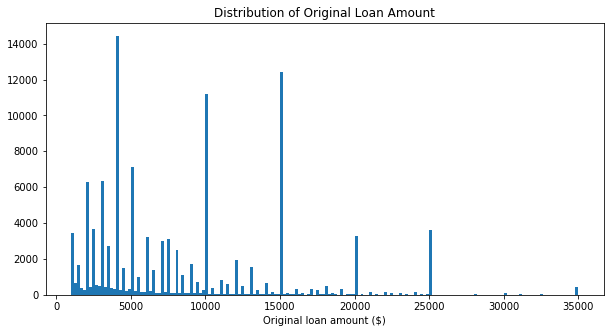

In [8]:
bins = np.arange(1000, loan.LoanOriginalAmount.max()+200, 200)
plt.figure(figsize=[10, 5])
plt.hist(data = loan, x = 'LoanOriginalAmount', bins = bins);
plt.xlabel('Original loan amount ($)')
plt.title('Distribution of Original Loan Amount');

## Effect of Original Loan Amount on Borrower's Rate
There is a negative correlation between BorrowerRate and LoanOriginalAmount which disagrees with my hypothesis: the higher the loan amount, the higher the interest rate. From the plot, it shows that the higher the loan amount, the lower the interest rate and lower loan amounts yields higher interest rates.

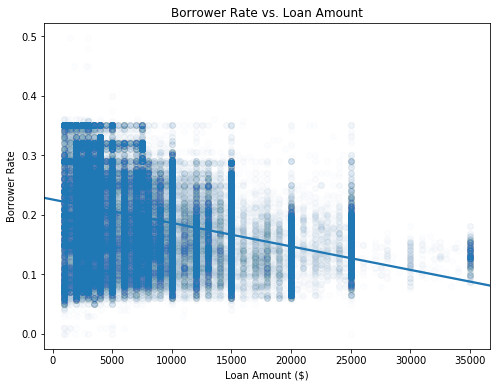

In [9]:
plt.figure(figsize = [8, 6])
sb.regplot(data = loan, x = 'LoanOriginalAmount', y = 'BorrowerRate', scatter_kws={'alpha':0.01});
plt.xlabel('Loan Amount ($)')
plt.ylabel('Borrower Rate')
plt.title('Borrower Rate vs. Loan Amount');

## Effect of Prosper Ratings on Borrower's Rate
The BorrowerRate decreases with better ratings. Borrowers with the best ratings have the lowest interest rate. This shows that Prosper Ratings has a strong effect on Borrower's interest rate.

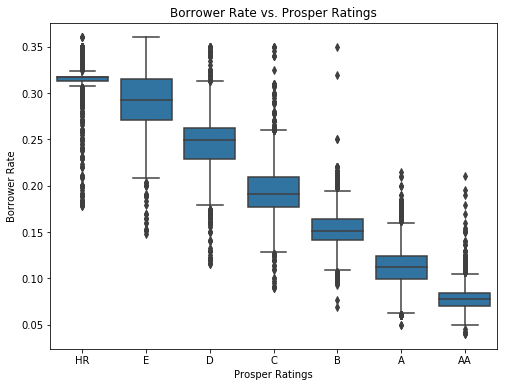

In [11]:
plt.figure(figsize=[8,6])
plot_color = sb.color_palette()[0]
sb.boxplot(data=loan, x='ProsperRating (Alpha)', y='BorrowerRate', color=plot_color)
plt.xlabel('Prosper Ratings')
plt.ylabel('Borrower Rate')
plt.title('Borrower Rate vs. Prosper Ratings');

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt 

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 455538 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
